<a href="https://colab.research.google.com/github/luanvarg/Proyecto-1/blob/main/Proyecto_1_ROGRAMA_ESPECIALIZADO_CIENCIA_DE_DATOS_CON_PYTHON_LuisVargas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio N°1:
Escribir un programa que pregunte al usuario por las ventas de los últimos 5 días, y muestre por pantalla una serie con los datos de las ventas por producto: Nro de unidades y precio unitario, indexada por los días, antes y después de aplicarles un descuento del 5%.


In [ ]:
import numpy as np
import pandas as pd

algo= ''
listaTotal=[]
listaParcial=[]
while algo != 'no':
    
  dia= int(input("Ingresa el día (1-5): "))
  listaTotal.append(dia)
  producto= input("Ingresa el producto: ")
  listaTotal.append(producto)
  cantidad= int(input("Ingrese la cantidad vendidas del producto: "))
  listaTotal.append(cantidad)
  precio= float(input("Ingrese precio unitario del producto: "))
  listaTotal.append(precio)
  precioSin= cantidad*precio
  listaTotal.append(precioSin)
  precio5= precioSin-(precioSin*0.05)
  listaTotal.append(precio5)
  algo= (input("Desea continuar ingresando productos (si/no): ")).lower()

lenLista= int(len(listaTotal))
fila= int(lenLista/6)
matrizgeneral= np.array(listaTotal).reshape(fila,6)
indicesP= matrizgeneral[:,0]
matrizData= matrizgeneral[:,1:]
df1 = pd.DataFrame(
    data=matrizData,
    index=indicesP.tolist(), # Index
    columns=["Producto","Nro Unidades","Precio","Precio Sin Descuento","Precio con descuento"])

print(df1.sort_index())

Ingresa el día (1-5): 1
Ingresa el producto: jola
Ingrese la cantidad vendidas del producto: 2
Ingrese precio unitario del producto: 3
Desea continuar ingresando productos (si/no): si
Ingresa el día (1-5): 2
Ingresa el producto: chao
Ingrese la cantidad vendidas del producto: 2
Ingrese precio unitario del producto: 3
Desea continuar ingresando productos (si/no): no
  Producto Nro Unidades Precio Precio Sin Descuento Precio con descuento
1     jola            2    3.0                  6.0                  5.7
2     chao            2    3.0                  6.0                  5.7


Ejercicio N°2: Escribir un programa que reciba un diccionario con los ingresos
mensuales de los clientes de una empresa, y devuelva una serie
con el ingreso mínimo, máximo y media.

In [ ]:
import numpy as np
import pandas as pd

def ingresos(dic):
  listaIngresos= list(dic.values())
  ListaClientes= list(dic.keys())
  ingresos_array= np.array(listaIngresos)
  media= np.mean(ingresos_array)
  max= np.max(ingresos_array)
  min= np.min(ingresos_array)
  minmaxmean= np.array((min,max,media)).reshape(1,3)
  df1 = pd.DataFrame(data= minmaxmean, columns= ["Minimo","Máximo","Media"])

  return df1

dic= {"Cliente1": 20.6, "Cliente 2": 40.8, "Cliente 3": 10.0}

df1= ingresos(dic)
print(df1)




   Minimo  Máximo  Media
0    10.0    40.8   23.8


Ejercicio N°3: Escribir programa que genere y muestre por pantalla un DataFrame
con los datos de la tabla siguiente:


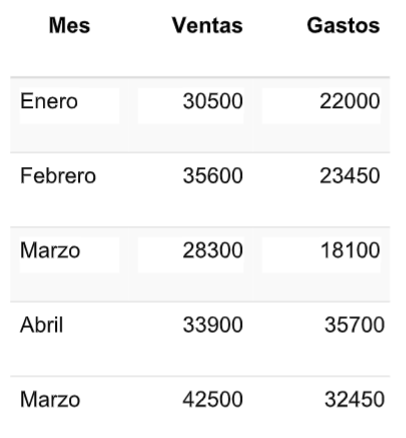

A continuación, generar nuevas columna:
1. Columna 1 = Gasto/Ventas*100.
2. Columna 2 = Si Ventas&gt;= 3000, imprimir “Meta Superada”,
caso contrario imprimir “Meta no Superada”.
3. Columna 3 = Si Gasto&gt;Ventas, calcular el sobre gasto.
4. Obtener el total de las ventas de los últimos 3 meses
5. Obtener el total de gastos de febrero a abril

In [7]:
from numpy.core.numeric import indices
import numpy as np
import pandas as pd

listameses= ["Enero","Febrero","Marzo","Abril","Marzo"]
listaventas= [30500,35600,28300,33900,42500]
listagastos= [22000,23450,18100,35700,32450]

dataE3= np.array([listameses,listaventas,listagastos]).T
df1 = pd.DataFrame(data= dataE3, columns= ["Mes","Ventas","Gastos"])
print("DataFrame con datos de la tabla\n")
print(df1)
arrayventas= np.array(listaventas)
arraygastos= np.array(listagastos)

columna1= (arraygastos/arrayventas)*100

df1["Columna 1"]= columna1
print("DataFrame agregando Columna 1\n")
print(df1)
columna2=[]
for i in listaventas:
  if i >= 3000:
    columna2.append("Meta Superada")
  else:
    columna2.append("Meta no Superada")
print("DataFrame agregando Columna 2\n")
df1["Columna 2"]= np.array(columna2)
print(df1)
columna3=[]
for i in range(len(listagastos)):
  if listagastos[i]>listaventas[i]:
    sobregasto= listagastos[i]-listaventas[i]
    columna3.append(sobregasto)
  else:
    columna3.append("No hay sobregasto")
print("DataFrame agregando Columna 3\n")
df1["Columna 3"]= np.array(columna3)
print(df1)
print("Ventas de ultimos 3 meses")
df2= df1.tail(4)
df2_array= np.array(df2)
df3 = pd.DataFrame(data= df2_array[:,0:2], columns= ["Mes","Ventas"])
print(df3)

print("Las ventas totales en los ultimos tres meses es de: ", arrayventas[1:].sum())
dataE= np.array([listameses[1:],listagastos[1:]]).T
df4 = pd.DataFrame(data= dataE, columns= ["Mes","Gastos"])
print(df3)

print("Los gastos totales desde frebreo hasta abril es de: ", arraygastos[1:].sum())


DataFrame con datos de la tabla

       Mes Ventas Gastos
0    Enero  30500  22000
1  Febrero  35600  23450
2    Marzo  28300  18100
3    Abril  33900  35700
4    Marzo  42500  32450
DataFrame agregando Columna 1

       Mes Ventas Gastos   Columna 1
0    Enero  30500  22000   72.131148
1  Febrero  35600  23450   65.870787
2    Marzo  28300  18100   63.957597
3    Abril  33900  35700  105.309735
4    Marzo  42500  32450   76.352941
DataFrame agregando Columna 2

       Mes Ventas Gastos   Columna 1      Columna 2
0    Enero  30500  22000   72.131148  Meta Superada
1  Febrero  35600  23450   65.870787  Meta Superada
2    Marzo  28300  18100   63.957597  Meta Superada
3    Abril  33900  35700  105.309735  Meta Superada
4    Marzo  42500  32450   76.352941  Meta Superada
DataFrame agregando Columna 3

       Mes Ventas Gastos   Columna 1      Columna 2          Columna 3
0    Enero  30500  22000   72.131148  Meta Superada  No hay sobregasto
1  Febrero  35600  23450   65.870787  Meta Super

Ejercicio N°4: Con el siguiente fichero Data - Riesgos.csv contiene información
de riesgo de clientes de un banco. Escribir un programa con los
siguientes requisitos:
1. Generar un DataFrame con los datos del fichero.
2. Mostrar por pantalla las dimensiones del DataFrame, el
número de datos que contiene, los nombres de sus columnas
y filas, los tipos de datos de las columnas, mostrar las 10
primeras filas y las 10 últimas filas, verificar si tiene datos
perdidos/nulos.
3. Extraer las 100 primeras columnas y almacenarlas en un
contenedor.

In [6]:
import numpy as np
import pandas as pd

from google.colab import files
files.upload()
df_riesgo = pd.read_csv('Data - Riesgos.csv')
print("DataFrame con los datos del fichero\n")
print(df_riesgo)

print("Información del DatFrame")
dfriesgo_info= df_riesgo.info()
print(dfriesgo_info)
print("Información sobre filas del DataFrame")
print(df_riesgo.index)
print("DataFrame con las 10 primeras filas")
print(df_riesgo.head(10))
print("DataFrame con las 10 útimas filas")
print(df_riesgo.tail(10))

print("DataFrame con las 100 primeras filas")
riesgo100= df_riesgo.head(100)
print(riesgo100)

Saving Data - Riesgos.csv to Data - Riesgos (5).csv
        ID  edad  meses  max_ant  ...  tipo_vivienda  zona  nivel  riesgo
0     2208  33.0  128.0      6.0  ...              2   3.0      2       1
1     2211  32.0  185.0      7.0  ...              2   1.0      5       1
2     2212  28.0    NaN      7.0  ...              2   1.0      2       1
3     2216  56.0  200.0      0.0  ...              2   1.0      5       1
4     2218  32.0  131.0     65.0  ...              2   1.0      2       1
...    ...   ...    ...      ...  ...            ...   ...    ...     ...
4495  1494  54.0  510.0     87.0  ...              2   1.0      2       0
4496  1495  63.0  305.0     99.0  ...              2   5.0      2       0
4497  1496  48.0  194.0    124.0  ...              4   1.0      2       0
4498  1497  39.0  245.0    121.0  ...              4   5.0      2       0
4499  1499  65.0  674.0     38.0  ...              4   5.0      2       0

[4500 rows x 10 columns]
<class 'pandas.core.frame.DataFram